<a href="https://colab.research.google.com/github/lechemrc/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

# sales_mean = sum(sales) / len(sales)
# print('The mean is:', sales_mean)

# sales_var = sum((x - sales_mean) for x in sales) ** 2 / len(sales)
# print('The variance is:', sales_var)

# sales_stdev = sales_var ** .5
# print('The standard deviation is:', sales_stdev)



def mean_var_stdev(nums):
  '''Calculates the mean, variance, 
  and standard deviation of a set of numbers'''
  
  # equations 
  mean = sum(nums) / len(nums)
  variance = sum((i - mean) for i in sales) ** 2 / len(nums)
  standard_dev = variance ** .5
  
  # outputs 
  return 'The mean is:', mean, 'The variance is:', variance, 'The standard deviation is:', standard_dev




# functions for each of the three parts separated out
def mean(nums):
  return "The mean is: ", sum(nums) / len(nums)
  
def variance(nums):
  variance = sum((i - (sum(nums) / len(nums))) for i in sales) ** 2 / len(nums)
  return "The variance is: ", variance
  
def stdev(nums):
  return "The standard deviation is: ", (sum((i - (sum(nums) / len(nums))) 
                                             for i in nums) ** 2 / len(nums)) ** .5


print(mean_var_stdev(sales))
# print(mean(sales))
# print(variance(sales))
# print(stdev(sales))

('The mean is:', 3052.714285714286, 'The variance is:', 2.95421647340367e-26, 'The standard deviation is:', 1.7187834283014454e-13)


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use library functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

# finding covariance of sales (above) and customers
df = pd.DataFrame({'sales' : sales, 'customers' : customers})
print(df.head())
df.cov()

   sales  customers
0   3505        127
1   2400         80
2   3027        105
3   2798         92
4   3700        120


,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
# standard deviation of customers
stdev_cust = stdev(customers)
print(stdev_cust)

# standard deviation of sales
stdev_sales = stdev(sales)
print(stdev_sales)

# stdev_sc = pd.DataFrame({'stdev_sales':stdev_sales, 'stdev_cust':stdev_cust })

# stdev_sc.head()

5.371198213442017e-15
1.7187834283014454e-13


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

#### cleaning some of the data

In [0]:
import pandas as pd

#importing the data
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', index_col=0)
print(df.shape)
df.head()

(1310, 15)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
df_nums = df[['pclass', 'survived', 'age', 'parch', 'ticket', 'fare', 'boat', 
             'has_cabin_number']]

df_nums.head()

,pclass,survived,age,parch,ticket,fare,boat,has_cabin_number
1,1.0,1.0,29.0000,0.0,24160,211.3375,2,1
2,1.0,1.0,0.9167,2.0,113781,151.5500,11,1
3,1.0,0.0,2.0000,2.0,113781,151.5500,NaN,1
4,1.0,0.0,30.0000,2.0,113781,151.5500,NaN,1
5,1.0,0.0,25.0000,2.0,113781,151.5500,NaN,1


In [0]:
df_nums.isna().sum()

pclass                1
survived              1
age                   0
parch                 1
ticket                1
fare                  2
boat                824
has_cabin_number      0
dtype: int64

In [0]:
df_nums = df_nums.drop('boat', axis=1)

df_nums.head()

,pclass,survived,age,parch,ticket,fare,has_cabin_number
1,1.0,1.0,29.0000,0.0,24160,211.3375,1
2,1.0,1.0,0.9167,2.0,113781,151.5500,1
3,1.0,0.0,2.0000,2.0,113781,151.5500,1
4,1.0,0.0,30.0000,2.0,113781,151.5500,1
5,1.0,0.0,25.0000,2.0,113781,151.5500,1


In [0]:
df_nums = df_nums.dropna()
df_nums.isna().sum()

pclass              0
survived            0
age                 0
parch               0
ticket              0
fare                0
has_cabin_number    0
dtype: int64

#### calculating variance-covariance matrix

In [0]:
df_nums.cov()

,pclass,survived,age,parch,fare,has_cabin_number
pclass,0.702126,-0.127139,-3.974162,0.013505,-24.227788,-0.250062
survived,-0.127139,0.236319,-0.305629,0.034690,6.146023,0.061387
age,-3.974162,-0.305629,165.385957,-1.451467,114.416613,1.470661
parch,0.013505,0.034690,-1.451467,0.749654,9.928031,0.013260
fare,-24.227788,6.146023,114.416613,9.928031,2678.959738,10.976961
has_cabin_number,-0.250062,0.061387,1.470661,0.013260,10.976961,0.174803


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

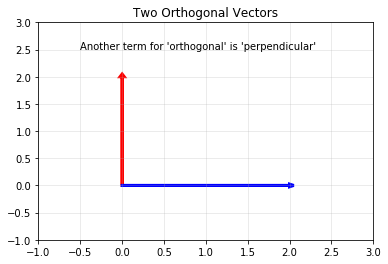

In [0]:
ihat = [0, 2]
jhat = [2, 0]

plt.xlim(-1, 3)
plt.ylim(-1, 3)

plt.arrow(0, 0, ihat[0], ihat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, jhat[0], jhat[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.grid(b=True, alpha=0.3)
plt.title('Two Orthogonal Vectors')
plt.text(x=-0.5, y=2.5, s="Another term for 'orthogonal' is 'perpendicular'")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

#multiplying dot product 
def orthogonal(vector1, vector2):
  ''' Determining if two vectors are orthogonal using dot product '''
  
  if np.dot(vector1, vector2) == 0:
    return np.dot(vector1, vector2), 'These vectors are orthogonal'
  else: 
    return np.dot(vector1, vector2), 'These are not orthogonal because the dot product != 0'
  
orthogonal(a, b)

(-40, 'These are not orthogonal because the dot product != 0')

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])

In [0]:
#magnitude/norm squared 
np.linalg.norm(c) ** 2

665.0

In [0]:
#c dot product c
np.dot(c, c)

665

In [0]:
# c tranpose multiply c
np.matmul(c.T, c)

665

All of these values have the same answer of 665, though I'm not totally sure why

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} 
= 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} 
+ 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} 
= 2\hat{i} + 3\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 7 \\ 12 \\ -8 \end{bmatrix} 
= 2 \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} 
+ 11 \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} 
- 8 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} 
= 2\hat{i} + 3\hat{j} + -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4, 12, 11, 9, 2])

# find 1 over norm of f
div = np.array([1 / np.linalg.norm(f)])

# multiply by f
f_hat = np.multiply(div, f)
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

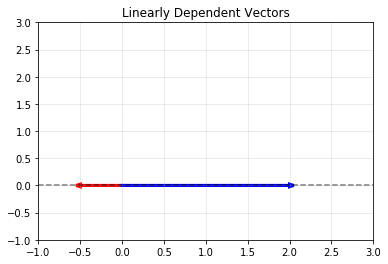

In [0]:
ihat = [-0.5, 0]
jhat = [2, 0]

plt.xlim(-1, 3)
plt.ylim(-1, 3)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals
plt.plot(x_vals, y_vals, '--', color='k', alpha=0.5)

plt.arrow(0, 0, ihat[0], ihat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, jhat[0], jhat[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.grid(b=True, alpha=0.3)
plt.title('Linearly Dependent Vectors')
plt.show()

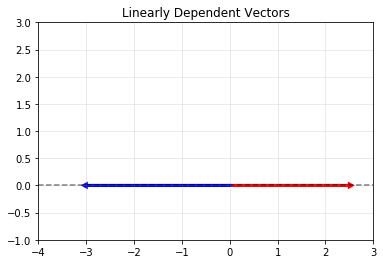

In [0]:
ihat = [2.5, 0]
jhat = [-3, 0]

plt.xlim(-4, 3)
plt.ylim(-1, 3)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals
plt.plot(x_vals, y_vals, '--', color='k', alpha=0.5)


plt.arrow(0, 0, ihat[0], ihat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, jhat[0], jhat[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.grid(b=True, alpha=0.3)
plt.title('Linearly Dependent Vectors')
plt.show()

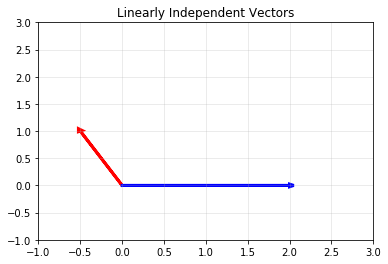

In [0]:
ihat = [-0.5, 1]
jhat = [2, 0]

plt.xlim(-1, 3)
plt.ylim(-1, 3)

plt.arrow(0, 0, ihat[0], ihat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, jhat[0], jhat[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.grid(b=True, alpha=0.3)
plt.title('Linearly Independent Vectors')
plt.show()

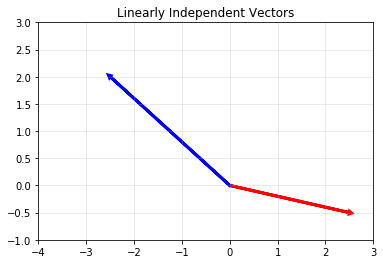

In [0]:
ihat = [2.5, -0.5]
jhat = [-2.5, 2]

plt.xlim(-4, 3)
plt.ylim(-1, 3)

plt.arrow(0, 0, ihat[0], ihat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, jhat[0], jhat[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.grid(b=True, alpha=0.3)
plt.title('Linearly Independent Vectors')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

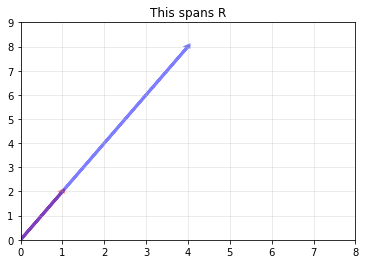

In [0]:
g = [1, 2]
h = [4, 8]

plt.xlim(0, 8)
plt.ylim(0, 9)

plt.arrow(0, 0, g[0], g[1], linewidth=3, head_width=.05, head_length=0.05, color ='red', alpha=0.5)
plt.arrow(0, 0, h[0], h[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue', alpha=0.5)
plt.grid(b=True, alpha=0.3)
plt.title('This spans R')
plt.show()

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# These vectors span R**3 space due to the third dimension in each one 

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



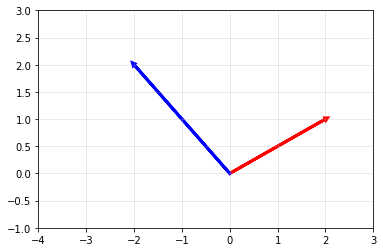

In [0]:
ihat = [2, 1]
jhat = [-2, 2]

plt.xlim(-4, 3)
plt.ylim(-1, 3)

plt.arrow(0, 0, ihat[0], ihat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, jhat[0], jhat[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.grid(b=True, alpha=0.3)
plt.show()

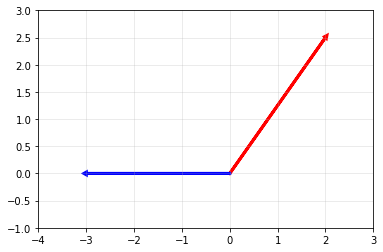

In [0]:
ihat = [2, 2.5]
jhat = [-3, 0]

plt.xlim(-4, 3)
plt.ylim(-1, 3)

plt.arrow(0, 0, ihat[0], ihat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, jhat[0], jhat[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.grid(b=True, alpha=0.3)
plt.show()

## 6.2 What does it mean to form a basis?

In generic terms, it means it sets the foundation. With these vectors, it forms the two dimensions to for R**2, or in other words, they form a basis for 2-dimensional space, though it is not orthogonal space. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
p = np.array([[1, 2, 3],
              [-1, 0, 7],
              [4, 8, 2]])

np.linalg.matrix_rank(p)

3

Stepping through....

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 2 & 10 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

Divide second row by 2

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

subtract 4 from 3rd row

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 4  & -2
\end{bmatrix}
\end{align}

subtract 4 times second row from 3rd row

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 0  & -22
\end{bmatrix}
\end{align}

divide last row by -22

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 0 & 1 & 5 \\
0 & 0  & 1
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

It tells us what dimension of space it occupies

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

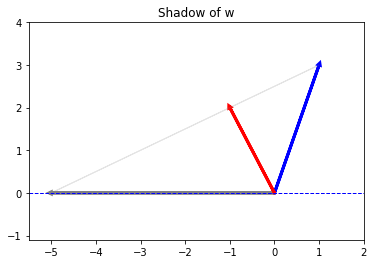

In [0]:
# Axis Bounds
plt.xlim(-5.5, 2)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,3] 
w = [-1,2]
proj = [-5,0]

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='b')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='r')
plt.arrow(1, 3, -6, -3, color='gray', linewidth=1, alpha=0.2)

plt.title("Shadow of w")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

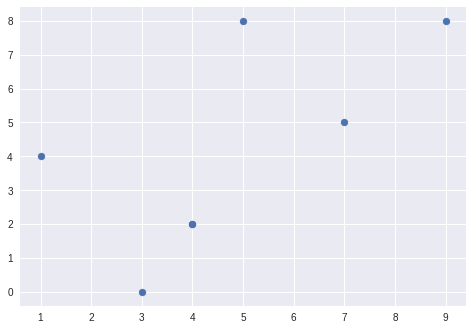

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()